import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv("Food_Nutrition_Dataset.csv")

In [4]:
df.head()

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food_name  205 non-null    object 
 1   category   205 non-null    object 
 2   calories   205 non-null    float64
 3   protein    205 non-null    float64
 4   carbs      205 non-null    float64
 5   fat        205 non-null    float64
 6   iron       203 non-null    float64
 7   vitamin_c  202 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.9+ KB


In [6]:
df.isnull().sum()

food_name    0
category     0
calories     0
protein      0
carbs        0
fat          0
iron         2
vitamin_c    3
dtype: int64

In [12]:
df=df.dropna()

In [17]:
df=df.drop_duplicates()

In [18]:
df['food_name'] = df['food_name'].str.strip().str.lower()
df['category'] = df['category'].str.strip().str.lower()

In [19]:
numeric_cols = ['calories', 'protein', 'carbs', 'fat', 'iron', 'vitamin_c']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [20]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food_name  200 non-null    object 
 1   category   200 non-null    object 
 2   calories   200 non-null    float64
 3   protein    200 non-null    float64
 4   carbs      200 non-null    float64
 5   fat        200 non-null    float64
 6   iron       200 non-null    float64
 7   vitamin_c  200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 14.1+ KB


food_name    0
category     0
calories     0
protein      0
carbs        0
fat          0
iron         0
vitamin_c    0
dtype: int64

In [13]:
df.describe()

,calories,protein,carbs,fat,iron,vitamin_c
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,240.045000,2.82860,25.605150,5.991200,0.836400,13.659500
std,273.284201,3.31691,20.215851,9.709067,1.077268,18.577279
min,16.000000,0.00000,1.790000,0.000000,0.000000,0.000000
25%,62.000000,0.63750,11.275000,0.200000,0.207500,1.575000
50%,167.000000,1.75500,17.210000,1.180000,0.405000,7.250000
75%,291.500000,3.19250,37.475000,9.390000,1.070000,16.925000
max,1460.000000,17.80000,85.130000,74.020000,9.090000,136.000000


### Calorie Distribution
This histogram shows how calories are distributed across all food items in the dataset.


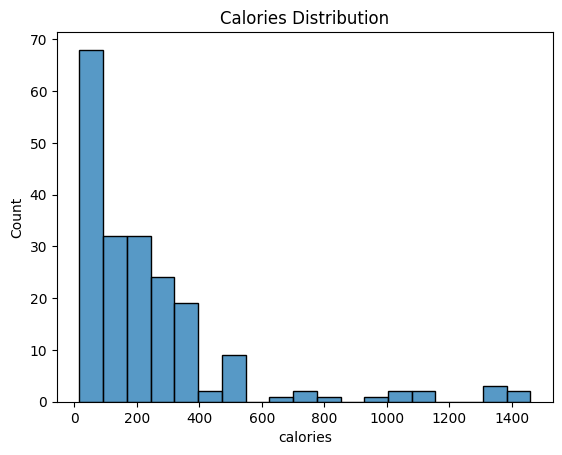

In [14]:
plt.figure()
sns.histplot(df['calories'])
plt.title("Calories Distribution")
plt.show()


### Calories vs Protein
This scatter plot shows the relationship between calorie content and protein content in the foods dataset.


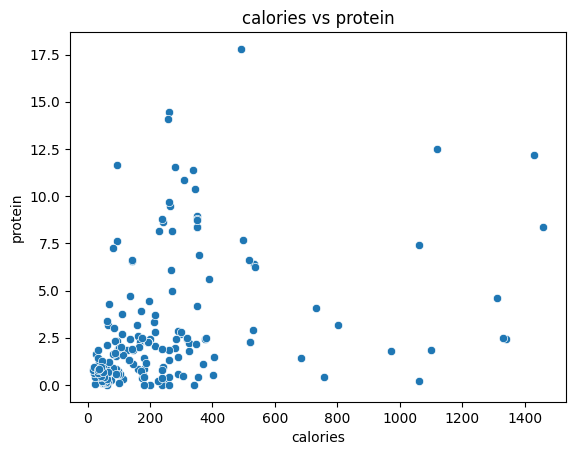

In [15]:
plt.figure()
sns.scatterplot(x='calories', y='protein', data=df)
plt.title("calories vs protein")
plt.show()


In [16]:
df.sort_values(by='calories', ascending=False).head()


,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
192,"Garlic bread, frozen",Baked Products,1460.0,8.36,41.7,16.60,3.05,0.2
202,"Fast foods, breadstick, soft, prepared with ga...",Fast Foods,1430.0,12.20,44.5,12.90,4.65,0.0
66,"Mango, dried, sweetened",Fruits and Fruit Juices,1340.0,2.45,78.6,1.18,0.23,42.3
110,"Blueberries, dried, sweetened",Fruits and Fruit Juices,1330.0,2.50,80.0,2.50,0.90,23.8
113,"Muffins, blueberry, toaster-type",Baked Products,1310.0,4.60,53.3,9.50,0.51,0.0


## research question 
which foods are highest in calories, and which categories do they belong to?


In [21]:
df.head()

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"apple, candied",apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"apple, raw",apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"apple, dried",dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"crisp, apple",cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"apple, baked",apples,113.0,0.32,22.70,3.08,0.19,3.9


In [23]:
top_calorie_foods = df.sort_values(by='calories', ascending=False).head(10)
top_calorie_foods[['food_name', 'category', 'calories']]
#top 10 high calorie foods


,food_name,category,calories
192,"garlic bread, frozen",baked products,1460.0
202,"fast foods, breadstick, soft, prepared with ga...",fast foods,1430.0
66,"mango, dried, sweetened",fruits and fruit juices,1340.0
110,"blueberries, dried, sweetened",fruits and fruit juices,1330.0
113,"muffins, blueberry, toaster-type",baked products,1310.0
123,"bread, potato",baked products,1120.0
84,"pears, dried, sulfured, uncooked",fruits and fruit juices,1100.0
7,"croissants, apple",baked products,1060.0
90,"toppings, strawberry",sweets,1060.0
115,"pie, blueberry, commercially prepared",baked products,971.0


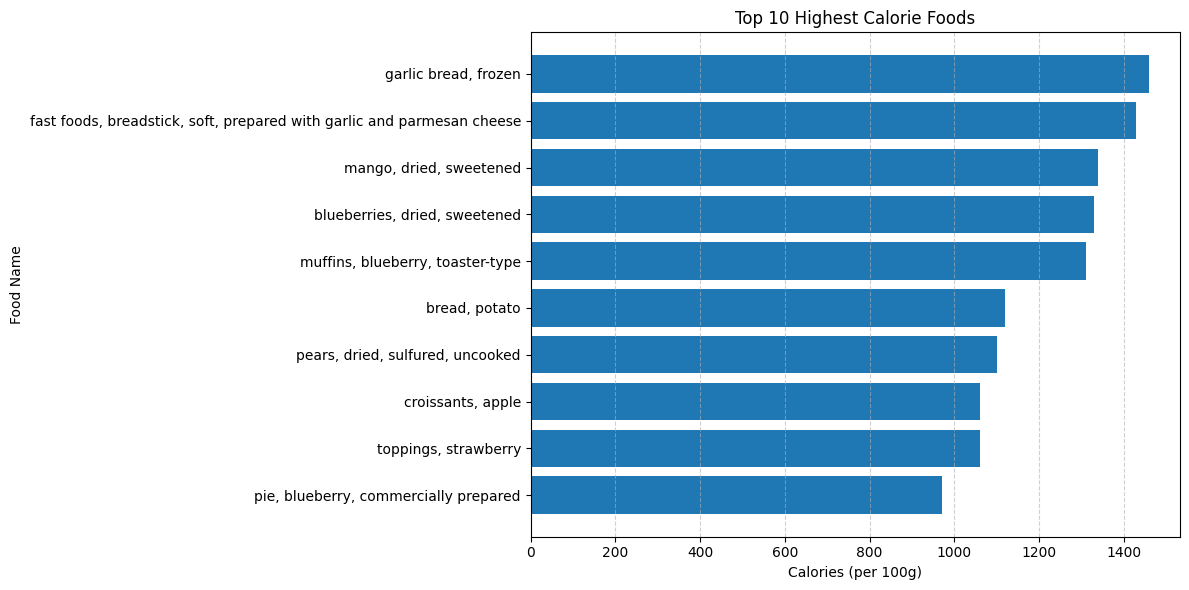

In [25]:
#visualization --bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_calorie_foods['food_name'], top_calorie_foods['calories'])
plt.xlabel("Calories (per 100g)")
plt.ylabel("Food Name")
plt.title("Top 10 Highest Calorie Foods")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#top 10 high calorie foods bar chart

In [27]:
#category Distribution of high-calorie foods
top_calorie_foods['category'].value_counts()
#this output shows To which category high calorie foods belongs mostly.


category
baked products             5
fruits and fruit juices    3
fast foods                 1
sweets                     1
Name: count, dtype: int64

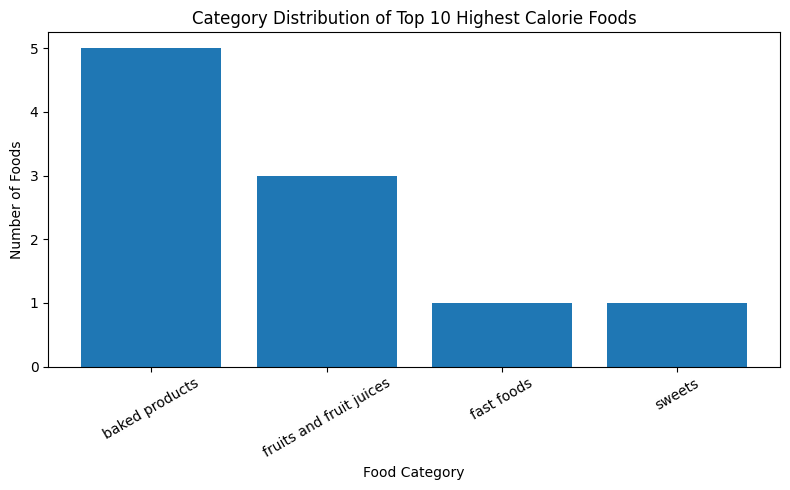

In [ ]:
import matplotlib.pyplot as plt

category_counts = top_calorie_foods['category'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Food Category")
plt.ylabel("Number of Foods")
plt.title("Category Distribution of Top 10 Highest Calorie Foods")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
#category Distribution of high-calorie foods bar chart 

## Conclusion
The analysis reveals that the highest calorie foods in the dataset predominantly belong to the *Baked Products* category. Items such as baked snacks and processed baked foods contribute significantly to higher calorie intake due to their high carbohydrate and fat content. This indicates that baked products are more energy-dense compared to other food categories. These findings highlight the importance of moderating the consumption of baked foods, especially for individuals managing weight or following calorie-controlled diets.